<h1>Laptop Price Predictor</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('csv\\laptop_data_actual.csv')
data

,Company,Inches,Cpu,Ram,Gpu,OpSys,SSD,Price
0,Lenovo,15.6,intel core i5-12450h,16gb,integrated graphics,No Os/ Linux,512gb ssd,499.00
1,Alurin,14.0,intel celeron n4020,8gb,integrated graphics,No Os/ Linux,256gb ssd,229.90
2,Acer,15.6,intel core i5-13420h,16gb,rtx 3050,No Os/ Linux,1tb ssd,769.00
3,HP,15.6,intel core i5-1335u,16gb,integrated graphics,No Os/ Linux,512gb ssd,599.00
4,MSI,17.3,intel core i7-13700h,16gb,rtx 4070,No Os/ Linux,1tb ssd,1399.00
...,...,...,...,...,...,...,...,...
2704,Vant,14.0,intel core i7-1255u,40 gb,integrated graphics,No Os/ Linux,1tb ssd,1217.00
2705,Vant,14.0,intel core i5-10210u,16gb,integrated graphics,No Os/ Linux,500gb ssd,994.00
2706,Vant,14.0,intel core i7-10510u,16gb,integrated graphics,No Os/ Linux,500gb ssd,1123.00
2707,Vant,14.0,intel core i7-10510u,16gb,integrated graphics,No Os/ Linux,500gb ssd,1123.00


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  2709 non-null   object 
 1   Inches   2705 non-null   float64
 2   Cpu      2705 non-null   object 
 3   Ram      2709 non-null   object 
 4   Gpu      2709 non-null   object 
 5   OpSys    2709 non-null   object 
 6   SSD      2709 non-null   object 
 7   Price    2709 non-null   float64
dtypes: float64(2), object(6)
memory usage: 169.4+ KB


In [35]:
data = data.drop(data[data['Inches'].isnull()].index)
data = data.drop(data[data['Cpu'].isnull()].index)

data.isnull().sum()

Company    0
Inches     0
Cpu        0
Ram        0
Gpu        0
OpSys      0
SSD        0
Price      0
dtype: int64

Cpu
intel core i7-13700h    182
intel core i5-1335u     144
intel core i5-1235u     138
intel core i7-1360p      99
intel core i7-1255u      95
                       ... 
max 14 n cleos            1
m2 pro 10 n cleos         1
amd ryzen 9 5900hs        1
intel core i9-11900h      1
intel core i7-6500u       1
Name: count, Length: 207, dtype: int64

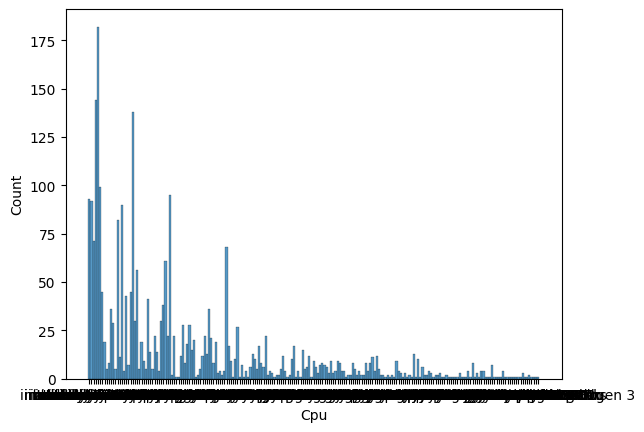

In [36]:
import seaborn as sns

sns.histplot(data=data,x='Cpu')
data['Cpu'].value_counts()

Cpu
intel core i7                896
intel core i5                831
low gamma intel processor    298
intel core i9                173
amd ryzen 5                  158
amd ryzen 7                  147
Mac Processor                 99
low gamma amd processor       57
amd ryzen 9                   42
Name: count, dtype: int64

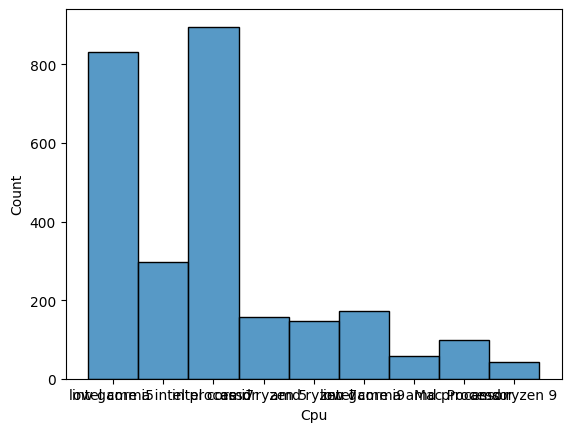

In [37]:
def cpu_type_define(text):
    text = text.split(' ')
    if text[0] == 'intel':
        if 'i' in text[-1]:
            if text[-1].split('-')[0] == 'i3':
                return 'low gamma intel processor'
                
            return text[0]+' '+text[1]+' '+text[-1].split('-')[0] 

        return 'low gamma intel processor'
    elif text[0] == 'amd':
        if text[1] == 'ryzen':
            if text[2] == '3':
                return 'low gamma amd processor'
            
            return text[0]+' '+text[1]+' '+text[2]
                    
        return 'low gamma amd processor'
    elif 'm' in text[0]:
        return 'Mac Processor'
    else:
        return 'Other Processor'

data['Cpu'] = data['Cpu'].apply(cpu_type_define)
sns.histplot(data=data,x='Cpu')
data['Cpu'].value_counts()

Gpu
integrated graphics          1735
Nivida medium gamma           414
Nvidia low gamma              308
Nvidia High gamma             119
Other nvidia grafic card       55
Apple integrated graphics      49
Amd low Gamma                  17
Amd High gamma                  4
Name: count, dtype: int64

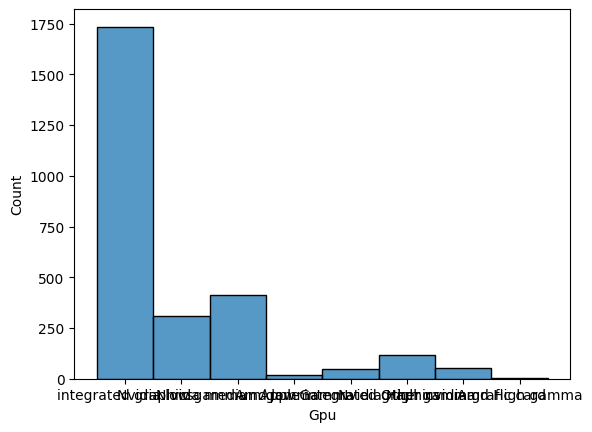

In [38]:
def gpu_type_define(text):    
    
    if 'rtx' in text:
        
        num = int(''.join([char for char in text if char.isdigit()]))
        
        if num == 4080 or num == 4090 or num == 3080:
            return 'Nvidia High gamma'
        elif num == 4070 or num == 3070 or num == 4060 or num == 2080:
            return 'Nivida medium gamma'
        elif num == 3050 or num == 3060 or num == 4050 or num == 2070:
            return 'Nvidia low gamma'
        else:
            return 'Other nvidia grafic card'
        
    elif 'radeon' in text:
        
        if 'rx' in text:
            return 'Amd High gamma'
        else:
            return 'Amd low Gamma'
        
    elif 'gpu' in text:
        return 'Apple integrated graphics'
    
    return text
       
    

data['Gpu'] = data['Gpu'].apply(gpu_type_define)
sns.histplot(data=data,x='Gpu')
data['Gpu'].value_counts()

In [39]:
def fitler_ssd(text):
    two_discs = text.split('+')
    
    
    if len(two_discs) == 2:
        return int(''.join([char for char in two_discs[0] if char.isdigit()])) + int(''.join([char for char in two_discs[1] if char.isdigit()]))        
    else:
        return int(''.join([char for char in text if char.isdigit()]))

data['SSD'] = data['SSD'].str.replace('tb','000')
data['SSD'] = data['SSD'].str.replace('gb','')
data['SSD'] = data['SSD'].str.replace('emmc','')
data['SSD'] = data['SSD'].str.replace('ssd','')
data['SSD'] = data['SSD'].apply(fitler_ssd)
data['SSD'].value_counts()

SSD
512      1176
1000      788
256       495
2000       68
500        62
128        52
64         37
32         13
4000        4
320         2
544         1
14          1
3000        1
50040       1
Name: count, dtype: int64

In [40]:
def filter_ram(text):
    try:
        return int(text)
    except:
        return None
    
data['Ram'] = data['Ram'].str.replace('gb','')
data['Inches'] = data['Inches'].astype('float')
data['Ram'] = data['Ram'].apply(filter_ram)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 2708
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  2701 non-null   object 
 1   Inches   2701 non-null   float64
 2   Cpu      2701 non-null   object 
 3   Ram      2698 non-null   float64
 4   Gpu      2701 non-null   object 
 5   OpSys    2701 non-null   object 
 6   SSD      2701 non-null   int64  
 7   Price    2701 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 189.9+ KB


In [41]:
data = data.drop(data[data['Ram'].isnull()].index)
data['Ram'] = data['Ram'].astype('int')
data['Price'] = data['Price'].astype('int')
data['OpSys'].value_counts()


OpSys
No Os/ Linux    2514
MacOs            130
Windows           54
Name: count, dtype: int64

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve, RocCurveDisplay,auc

encoded_data = data

X_train = encoded_data.drop(columns='Price')
Y_train = np.log(encoded_data['Price'])

X_train, X_val,y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.15,random_state=42)

X_train

,Company,Inches,Cpu,Ram,Gpu,OpSys,SSD
558,Lenovo,15.6,amd ryzen 7,16,integrated graphics,No Os/ Linux,512
892,Acer,15.6,intel core i5,16,Nvidia low gamma,No Os/ Linux,1000
600,Acer,15.6,intel core i5,16,Nvidia low gamma,No Os/ Linux,1000
2231,Lenovo,16.0,intel core i7,16,Nvidia low gamma,No Os/ Linux,1000
2012,Gigabyte,15.6,amd ryzen 9,16,Nivida medium gamma,No Os/ Linux,512
...,...,...,...,...,...,...,...
1644,MSI,17.3,intel core i9,64,Nvidia High gamma,No Os/ Linux,2000
1101,HP,15.6,intel core i7,16,integrated graphics,No Os/ Linux,512
1136,MSI,17.3,intel core i7,32,Nivida medium gamma,No Os/ Linux,1000
1300,Acer,16.0,intel core i7,16,integrated graphics,No Os/ Linux,256


<h1>Logistic Regresion</h1>

In [57]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(),[0,2,4,5])
],remainder='passthrough')
step2 = LogisticRegression(n_jobs=-1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

X_train = encoded_data.drop(columns='Price', axis=1)
Y_train = encoded_data['Price']

pipe.fit(X_train,Y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score -4086280.2574874237
MAE 1380.4370038650459


<h1>Random Forest</h1>

In [66]:
from sklearn.ensemble import RandomForestRegressor

step2 = RandomForestRegressor(n_estimators=300,
                              random_state=72,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=30)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.8025449764674745
MAE 0.20242587614473248


<h1>ExtraTreeRegressor</h1>

In [67]:
from sklearn.tree import ExtraTreeRegressor

step2 = ExtraTreeRegressor(max_depth=20,random_state=42)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.753053602951339
MAE 0.21737252284789502


<h1>GradientBoostingRegressor</h1>

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

step2 = GradientBoostingRegressor(n_estimators=300)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.8016121695768879
MAE 0.21125651480222743


<h1>XGBRegressor</h1>

In [75]:
from xgboost import XGBRegressor

step2 = XGBRegressor(n_estimators=75,max_depth=10,learning_rate=1)


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.7556368555892092
MAE 0.21263569399609733


<h1>Voting Regressor</h1>


In [76]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

rf = RandomForestRegressor(n_estimators=100,
                              random_state=42,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=500)
xgb = XGBRegressor(n_estimators=45,learning_rate=0.5,max_depth=5)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb)],weights=[5,1,1])


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.808520571009981
MAE 0.20049168922276547


<h1>Stacking</h1>

In [77]:
from sklearn.linear_model import Ridge

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=42,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=45,learning_rate=0.5,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.8074891026616011
MAE 0.20840804196330925


In [78]:
import pickle

pickle.dump(data,open('data_main.pkl','wb'))
pickle.dump(pipe,open('pipe_main.pkl','wb'))